<h1 style="color:rgb(0,120,170)">Assignment 4: Logistic Regression</h1>
<h2 style="color:rgb(0,120,170)">Machine Learning: Theoretical Concepts, SS 2019</h2>

<h3 style="color:rgb(0,120,170)">Deadline: see Moodle</h3>
Return this notebook with your code and answers.

In [1]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib
import matplotlib.pyplot as plt

# Exercise 4

<h3 style="color:rgb(0,120,170)"> Question 4.1 </h3>

The coefficients $\mathbf{w}$ of the Logistic Regression problem are usually estimated using the maximum likelihood method.
This leads to the optimization problem 
\begin{align*}
\min_{\mathbf{w}} L &= \min_{\mathbf{w}} \left(- \sum_i y_i \log \sigma(\mathbf{w}^T\mathbf{x}_i) + (1-y_i) \log (1-\sigma(\mathbf{w}^T \mathbf{x}_i)) \right)\\
\text{with} \quad \sigma(x) &= \frac{1}{1+\mathrm{e}^{-x}} 
\end{align*}
where $L = -\ln \mathcal{L}$ is the negative log-likelihood. Since there is no closed-form solution for $\mathbf{w}$, an iterative method $-$ such as gradient descent $-$ must be applied in order to find $\mathbf{w}$.  
Calculate the gradient $\frac{\partial L}{\partial \mathbf{w}}$, which is needed to apply gradient descent.
Hint: $\frac{\partial \sigma(x)}{\partial x} = \sigma(x) \cdot (1 - \sigma(x))$.

* <span style="color:rgb(0,120,170)">**TODO:** Markdown, Latex</span>

<h3 style="color:rgb(208,90,80)">Answer 4.1:</h3>

\begin{align*}
\frac{\partial L}{\partial \mathbf{w}} \big( - \sum_i^n y_i \log \sigma (\mathbf{w}^T \mathbf{x}_i) +  (1 - y_i) \log ( 1 - \sigma(\mathbf{w}^T \mathbf{x}_i))\big) &= \\
- \sum_i^n \frac{y_i \sigma (\mathbf{w}^T \mathbf{x}_i)'}{\sigma (\mathbf{w}^T \mathbf{x}_i)} + \frac{(1 - y_i) (1 - \sigma(\mathbf{w}^T \mathbf{x}_i))'}{1 - \sigma(\mathbf{w}^T \mathbf{x}_i)} &= \\
- \sum_i^n \frac{y_i (\mathbf{w}^T \mathbf{x}_i)' \sigma(\mathbf{w}^T \mathbf{x}_i)(1 - \sigma(\mathbf{w}^T \mathbf{x}_i))}{\sigma (\mathbf{w}^T \mathbf{x}_i)} + \frac{-(1 - y_i) (\mathbf{w}^T \mathbf{x}_i)'\sigma(\mathbf{w}^T \mathbf{x}_i)(1 - \sigma(\mathbf{w}^T \mathbf{x}_i))}{1 - \sigma(\mathbf{w}^T \mathbf{x}_i)} &= \\
- \sum_i^n y_i (\mathbf{w}^T \mathbf{x}_i)' (1 - \sigma(\mathbf{w}^T \mathbf{x}_i)) ~ - ~ (1 - y_i) (\mathbf{w}^T \mathbf{x}_i)'\sigma(\mathbf{w}^T \mathbf{x}_i) &= \\
- \sum_i^n y_i \mathbf{x}_i (1 - \sigma(\mathbf{w}^T \mathbf{x}_i)) ~ - ~ (1 - y_i) \mathbf{x}_i \sigma(\mathbf{w}^T \mathbf{x}_i) &= \\
- \sum_i^n \mathbf{x}_i \big( y_i (1 - \sigma(\mathbf{w}^T \mathbf{x}_i)) ~ - ~ (1 - y_i) \sigma(\mathbf{w}^T \mathbf{x}_i) \big) &= \\
- \sum_i^n \mathbf{x}_i \big( y_i - \sigma(\mathbf{w}^T \mathbf{x}_i) \big)
\end{align*}


<h3 style="color:rgb(0,120,170)"> Question 4.2 </h3>

Implement the formula for the gradient you found in Exercise 4.1. This means: implement a function 
`logistic_gradient(w, x, y)` that takes a parameter vector
$\mathbf{w}$, a data matrix $\mathbf{X}$ and a label vector
$\mathbf{y}$ and returns the gradient $\frac{\partial L}{\partial
\mathbf{w}}$.

Test this function by implementing Gradient Checking. To do this, implement
a function `numerical_gradient(w, x, y)` that takes the same parameters
as `logistic_gradient`, but calculates the gradient numerically via the central difference quotient.

Generate a random data matrix as well as random labels and a random weight
vector and use them as input of both functions. Compare the outputs.

* <span style="color:rgb(0,120,170)">**TODO:** Markdown / Latex</span>

<h3 style="color:rgb(208,90,80)">Answer 4.2:</h3>



In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def likelihood(w, X, y):
    l = 0
    for i in range(X.shape[0]):
        l -= y[i] * np.log(sigmoid(w.T @ X[i, :])) + (1 - y[i]) * np.log(1 - sigmoid(w.T @ X[i, :]))
    return l

def logistic_gradient(w, X, y):
    s = np.zeros(X.shape[1])
    for i in range(X.shape[0]):
        s += X[i, :] * (y[i] - sigmoid(w.T @ X[i, :]))
    return -s

def numerical_gradient(w, X, y):
    e = 1e-4
    E = np.identity(len(w))
    w_new = np.zeros_like(w)
    for i in range(len(w)):
        w_new[i] = (likelihood(w + e * E[i], X, y) - likelihood(w - e * E[i], X, y)) / (2 * e)
    return w_new

In [3]:
def gen_w_X_y(size, n_dimensions):
    w = np.random.rand(n_dimensions)
    X = np.random.randint(-4, 4, (size, n_dimensions))
    y = np.random.randint(0, 2, size)
    return w, X, y

def print_gradient(name, gradient, w, X, y):
    g = gradient(w, X, y)
    print(('%-9s' % name) + f' gradient: {g}')
    return g

w, X, y = gen_w_X_y(100, 3)
g1 = print_gradient('logistic', logistic_gradient, w, X, y)
g2 = print_gradient('numerical', numerical_gradient, w, X, y)

tol = 1e-5
print(f'All values closer than {tol}? {np.allclose(g1, g2, rtol=tol)}')

logistic  gradient: [49.29409746 23.12707273 34.54810494]
numerical gradient: [49.2940973  23.12707263 34.54810481]
All values closer than 1e-05? True


<h3 style="color:rgb(0,120,170)"> Question 4.3 </h3>

Consider the data sets `DataSet4a.csv` and `DataSet4b.csv`. 
Split each of these data sets into training set and test set ($50\,\%$ each).
Then use Logistic Regression with Gradient Descent to compute classifiers on the training set and
apply them to the test samples. Use randomly initialized weights, a learning rate of $10^{-4}$, and think of a good stopping criterion.

Predict class `1` if the Logistic Regression returns $\geq 0.5$ and `0` otherwise. 
Calculate Accuracy and Balanced Accuracy on the test samples.

Further provide ROC (receiver operating characteristic) curves of the classifiers on the test samples and compute the AUC (area under curve) value of these curves. Therefore the functions `roc_curve` and `auc` from `sklearn.metrics` might be useful.


* <span style="color:rgb(0,120,170)">**TODO:** Markdown / Latex</span>

<h3 style="color:rgb(208,90,80)">Answer 4.3:</h3>


In [4]:
A = np.genfromtxt('DataSet4a.csv', delimiter=',', skip_header=1)
B = np.genfromtxt('DataSet4b.csv', delimiter=',', skip_header=1)

# Converting class -1 to 0
X_a, y_a = A[:, :-1], (A[:, -1] > 0).astype(int)
X_b, y_b = B[:, :-1], (B[:, -1] > 0).astype(int)

print(X_a.shape, X_b.shape)

(120, 2) (350, 2)


In [5]:
from sklearn.model_selection import train_test_split

X_a_train, X_a_test, y_a_train, y_a_test = train_test_split(X_a, y_a, test_size=.5)
X_b_train, X_b_test, y_b_train, y_b_test = train_test_split(X_b, y_b, test_size=.5)

In [6]:
def logistic_regression(w, X, y, learning_rate=1e-4, max_iter=int(1e4)):
    w_curr = w.copy()
    for i in range(max_iter):
        w_prev = w_curr
        w_curr = w_prev - learning_rate * logistic_gradient(w_prev, X, y)
        if np.allclose(w_curr, w_prev, rtol=1e-4):
            print(f'Convergence reached in iteration {i}')
            return w_curr
    else:
        print(f'Regression did not converge after {max_iter} iterations')
        return w_curr
    
w_a = logistic_regression(np.random.rand(X_a.shape[1]), X_a_train, y_a_train)
w_b = logistic_regression(np.random.rand(X_b.shape[1]), X_b_train, y_b_train)

Convergence reached in iteration 6814
Convergence reached in iteration 7118


In [7]:
def classify(X, w):
    return np.asarray([(w.T @ x_i >= 0.5, w.T @ x_i) for x_i in X]).astype(float)

def accuracy(pred, test):
    return (pred == test).sum() / len(pred)

def balanced_accuracy(pred, test):
    positive = ((pred == 1) & (test == 1)).sum()
    negative = ((pred == 0) & (test == 0)).sum()
    return (positive / test.sum() + negative / (len(test) - test.sum())) / 2

pred_a = classify(X_a_test, w_a)
pred_b = classify(X_b_test, w_b)

def print_accuracy(name, dataset, fun, pred, test):
    print(f'Actual    : {test}')
    print(f'Prediction: {pred}')
    print(('%-17s' % name) + f' of dataset {dataset}: {fun(pred, test)}\n')
    
print_accuracy('Accuracy', 'a', accuracy, pred_a[:, 0], y_a_test)
print_accuracy('Balanced Accuracy', 'a', balanced_accuracy, pred_a[:, 0], y_a_test)
print_accuracy('Accuracy', 'b', accuracy, pred_b[:, 0], y_b_test)
print_accuracy('Balanced Accuracy', 'b', balanced_accuracy, pred_b[:, 0], y_b_test)

Actual    : [0 0 1 0 1 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 1 0 0
 1 1 0 0 0 1 1 1 1 0 0 1 0 0 1 0 1 0 0 1 1 1 0]
Prediction: [0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0.
 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0.]
Accuracy          of dataset a: 0.8333333333333334

Actual    : [0 0 1 0 1 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 1 0 0
 1 1 0 0 0 1 1 1 1 0 0 1 0 0 1 0 1 0 0 1 1 1 0]
Prediction: [0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0.
 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0.]
Balanced Accuracy of dataset a: 0.8348214285714286

Actual    : [0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0
 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1
 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0

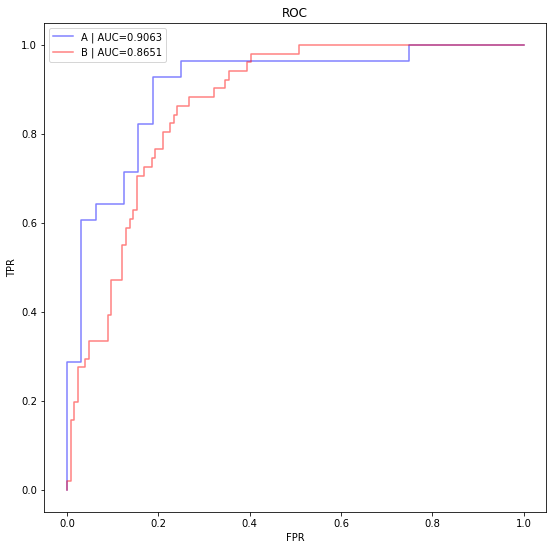

In [8]:
fpr_a, tpr_a, _ = roc_curve(y_a_test, pred_a[:, 1])
fpr_b, tpr_b, _ = roc_curve(y_b_test, pred_b[:, 1])

auc_a = auc(fpr_a, tpr_a)
auc_b = auc(fpr_b, tpr_b)

fig = plt.figure(figsize=(9, 9))
plt.title('ROC')
plt.plot(fpr_a, tpr_a, color='blue', alpha=0.5, label=f'A | AUC={"%.4f" % auc_a}')
plt.plot(fpr_b, tpr_b, color='red', alpha=0.5, label=f'B | AUC={"%.4f" % auc_b}')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

<h3 style="color:rgb(0,120,170)"> Question 4.4 </h3>

We consider again the objective of Logistic Regression, but now in a more abstract form, i.e. we set $net_i=\mathbf{w}^T\mathbf{x}_i$ and further $a_i=\sigma(net_i)$. Then the ojective can be  written as:
\begin{align*}
\min_{\mathbf{w}} \quad L &= - \sum_i y_i \log \sigma(net_i) + (1-y_i) \log (1-\sigma(net_i))\\
&= - \sum_i y_i \log a_i + (1-y_i) \log (1-a_i)\\
\text{with} \quad \sigma(x) &= \frac{1}{1+\mathrm{e}^{-x}} 
\end{align*}

Now, try to find $\frac{\partial L}{\partial a_i}$ and $\frac{\partial L}{\partial net_i}$. Simplify the terms as much as you can (especially $\frac{\partial L}{\partial net_i}$) and  express it only in terms of $y_i$, $a_i$ and basic arithmetic operations $(+,-,*,/)$. Which values are possible for $\frac{\partial L}{\partial net_i}$? Discuss what the sign and the interval of possible values of $\frac{\partial L}{\partial net_i}$ is for true positives, true negatives, false postives, and false negatives, where classification is done with the criterion $a_i \geq 0.5$. 

Consider the hint of Question 4.1.

* <span style="color:rgb(0,120,170)">**TODO:** Markdown, Latex</span>

<h3 style="color:rgb(208,90,80)">Answer 4.4:</h3>

\begin{align*}
\frac{\partial L}{\partial net_i} &= -\sum_i y_i \log \sigma(net_i) + (1 - y_i)\log(1 - \sigma(net_i)) \\
&= -\sum_i \frac{y_i \sigma(net_i) (1 - \sigma(net_i))}{\sigma(net_i)} - \frac{(1 - y_i)\sigma(net_i)(1 - \sigma(net_i))}{1 - \sigma(net_i)} \\
&= -\sum_i y_i(1 - \sigma(net_i)) - (1 - y_i)\sigma(net_i) \\
&= -\sum_i y_i - y_i\sigma(net_i) - \sigma(net_i) + y_i\sigma(net_i) \\
&= -\sum_i y_i - \sigma(net_i) \\
&= \sum_i \sigma(net_i) - y_i
\end{align*}

---

\begin{align*}
\frac{\partial L}{\partial a_i} &= -\sum_i y_i \log a_i + (1 - y_i)\log(1 - a_i) \\
&= -\sum_i \frac{y_i}{a_i} - \frac{1 - y_i}{1 - a_i} \\
&= -\sum_i \frac{y_i - y_i a_i}{a_i(1 - a_i)} - \frac{a_i - y_i a_i}{a_i(1 - a_i)} \\
&= -\sum_i \frac{y_i - y_i a_i - a_i + y_i a_i}{a_i(1 - a_i)} \\
&= -\sum_i \frac{y_i - a_i}{a_i(1 - a_i)} \\
&= \sum_i \frac{a_i - y_i}{a_i(1 - a_i)}
\end{align*}

---

With respect to 
\begin{align*}
-\sum_i \frac{y_i - a_i}{a_i(1 - a_i)}
\end{align*}

<table>
  <tr>
      <th/>
      <th> True Positive </th>
      <th> False Negative </th>
      <th> True Negative </th>
      <th> False Positive </th>
  </tr>
  <tr>
    <td> $y_i$ </td>
    <td> 1 </td>
    <td> 1 </td>
    <td> 0 </td>
    <td> 0 </td>
  </tr>
  <tr>
    <td> $actual$ </td>
    <td> 1 </td>
    <td> 0 </td>
    <td> 0 </td>
    <td> 1 </td>
  </tr>
  <tr>
    <td> $y_i$ $-actual$ </td>
    <td> 0 </td>
    <td> 1 </td>
    <td> 0 </td>
    <td> -1 </td>
  </tr>
  <tr>
    <td> $a_i$ </td>
    <td> $(0.5, 1)$ </td>
    <td> $(0, 0.5)$ </td>
    <td> $(0, 0.5)$ </td>
    <td> $(0.5, 1)$ </td>
  </tr>
  <tr>
    <td> $y_i - a_i$ </td>
    <td> $(0, 0.5)$ </td>
    <td> $(0.5, 1)$ </td>
    <td> $(-0.5, 0)$ </td>
    <td> $(-1, -0.5)$ </td>
  </tr>
  <tr>
    <td> Sign (see $y_i - a_i$) </td>
    <td> + </td>
    <td> + </td>
    <td> - </td>
    <td> - </td>
  </tr>
</table>